In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Business Problem
- In recent years, city hotel and resort hotel have seen high cancellation rates. Each hotel is now dealing with a number of issues as a result, including fewer revenues and less then ideal hotel room use. Consequently, lowering cancellation rates is both hotels' primary goal in order to increase their efficieny in generating their revenue and for us to offer thourough business advice to address this problem 

- The analysis of hotel vookin cancellations as well as other factors that have no bearing on their business and yearly revenue generation are the main topics of the resort.

# Assumptions
- No unusual occurence between 2015 & 2017 will have a substanital impact on the data used
- The info is still current and can be used to analyze a hotel's possible plans in an efficient manner
- There are no unanticipated negatives to the hotel employing any advised technique
- The hotels are not currently using any suggested solutions.
- The biggest factor affecting the effectiveness of earning income is booking cancellations.
- Cancellations result in vacant rooms for the booked length of time
- Clients make hotel reservations the same year they make cancellations

# Research Question
- What are the variables that affect hotel reservation cancellations?
- How can we make hotel reservation cancellations better?
- How will hotals be assisted in making pricing and promotional decisions?


# Hypothesis
- More cancellations will occur when prices are higher
- When there is a longer waiting list, customers tend to cancel more frequently.
- Moajoirty of clients are coming from offline travel agents to make their reservations

In [2]:
# Importing the data

In [3]:
data = pd.read_csv(r"C:\Users\chris\Downloads\hotel_bookings 2.csv")

In [4]:
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Data Cleaning

In [6]:
# Converting reservation_status_date datatype to datetime

In [7]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

C:\Users\chris\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/11/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\chris\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23/10/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\chris\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/10/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\chris\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/10/2015' in DD/MM/YYYY format. Provide format or specif

In [8]:
data.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [9]:
# Checking for null values

In [10]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
# Since the null values in agent & company col. are in thousands we will drop those columns

In [12]:
data.drop(['agent','company'],axis=1,inplace=True)

In [13]:
# Dropping null values

In [14]:
data.dropna(inplace=True)

In [15]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [16]:
# Checking for duplicates

In [17]:
data.duplicated().any()

True

In [18]:
data.drop_duplicates(inplace=True)

In [19]:
data.duplicated().any()

False

In [20]:
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-03-07


# Data Visualization

In [21]:
# finding the percentage of reservations canceled & not canceled

In [22]:
cancelled_precentage = data['is_canceled'].value_counts(normalize=True)
cancelled_precentage

0    0.724061
1    0.275939
Name: is_canceled, dtype: float64

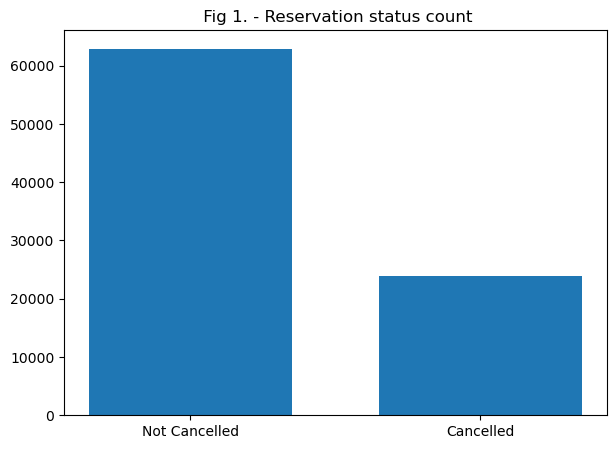

In [54]:
plt.figure(figsize=(7,5))
plt.bar(['Not Cancelled','Cancelled'],data['is_canceled'].value_counts(),width=0.7)
plt.title(' Fig 1. - Reservation status count')
plt.show()

In [24]:
data['hotel'].value_counts()

City Hotel      53404
Resort Hotel    33510
Name: hotel, dtype: int64

In [25]:
# reservation status based on hotels

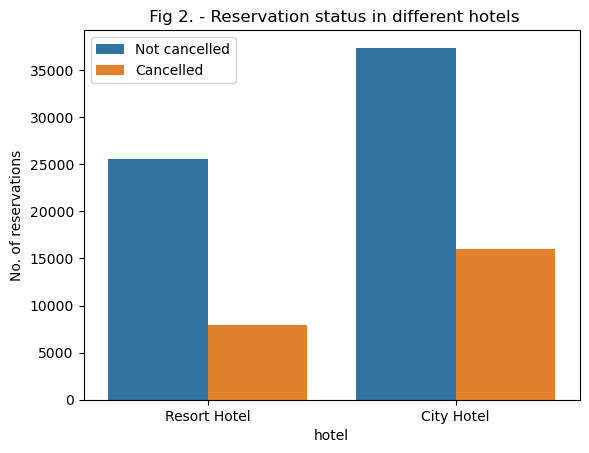

In [56]:
ax1 = sns.countplot(x='hotel',hue='is_canceled',data=data)
plt.title(' Fig 2. - Reservation status in different hotels')
plt.legend(['Not cancelled','Cancelled'])
plt.ylabel('No. of reservations')
plt.show()

In [27]:
# Finding out % of cancellation in resort hotel

In [28]:
resort_hotel = data[data['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

0    0.762936
1    0.237064
Name: is_canceled, dtype: float64

In [29]:
# Finding out % of cancellation in city hotel

In [30]:
city_hotel = data[data['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

0    0.699667
1    0.300333
Name: is_canceled, dtype: float64

In [31]:
data.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07


In [32]:
# Finding out the reservation status per month

In [33]:
data['month'] = data['reservation_status_date'].dt.month

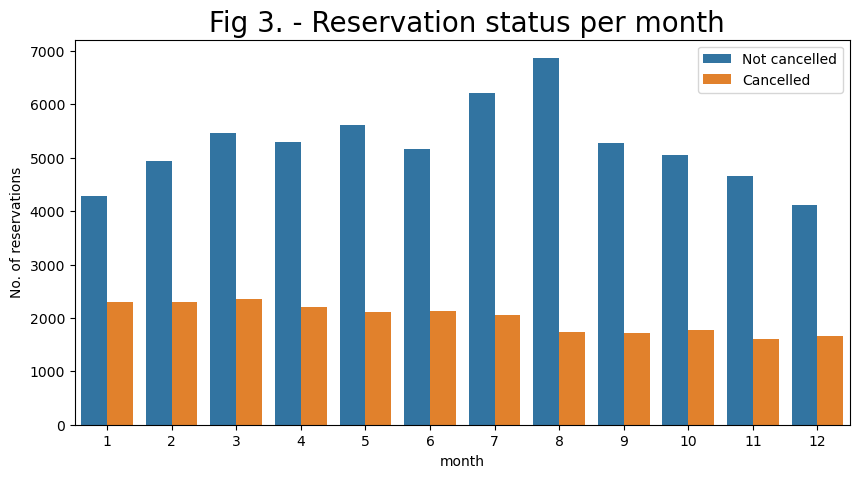

In [57]:
plt.figure(figsize=(10,5))
sns.countplot(x='month',hue='is_canceled',data=data)
plt.title(' Fig 3. - Reservation status per month',fontsize=20)
plt.ylabel('No. of reservations')
plt.legend(['Not cancelled','Cancelled'])
plt.show()

In [35]:
data2=data[data['is_canceled']==1].groupby('month')[['adr']].sum().reset_index()

In [36]:
data2

,month,adr
0,1,241473.42
1,2,256144.82
2,3,287499.10
3,4,280609.42
4,5,272285.22
5,6,281448.49
6,7,270481.48
7,8,210677.17
8,9,194594.03
9,10,185218.68


C:\Users\chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


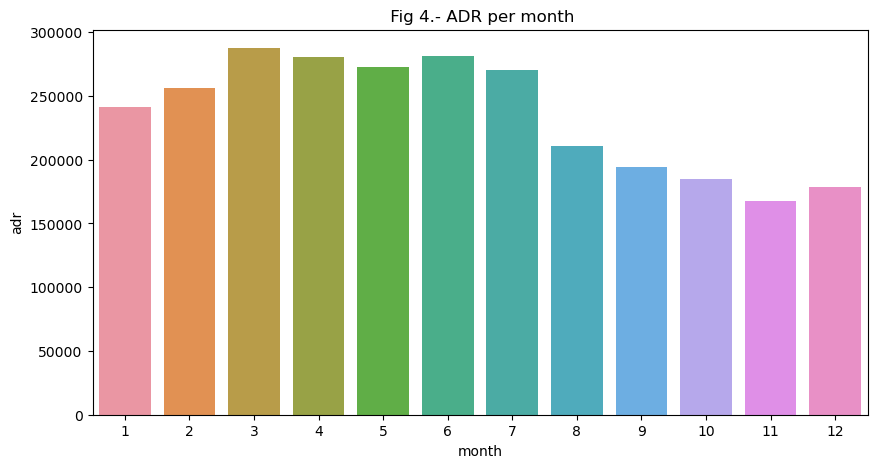

In [58]:
plt.figure(figsize=(10,5))
sns.barplot('month','adr',data=data2)
plt.title(' Fig 4.- ADR per month')
plt.show()

In [38]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'month'],
      dtype='object')

In [39]:
notcancelled_data = data[data['is_canceled'] == 0]

In [40]:
# Countries with the highest number of cancellations

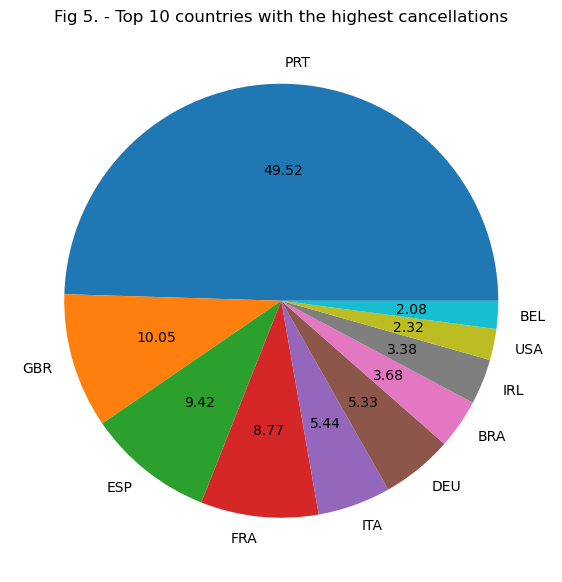

In [59]:
cancelled_data = data[data['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts().head(10)
plt.figure(figsize=(7,8))
plt.title('Fig 5. - Top 10 countries with the highest cancellations')
plt.pie(top_10_country,autopct='%0.2f',labels=top_10_country.index)
plt.show()

In [42]:
 data['market_segment'].value_counts()

Online TA        51534
Offline TA/TO    13849
Direct           11645
Groups            4936
Corporate         4025
Complementary      698
Aviation           227
Name: market_segment, dtype: int64

In [43]:
 data['market_segment'].value_counts(normalize=True)*100

Online TA        59.293094
Offline TA/TO    15.934142
Direct           13.398302
Groups            5.679177
Corporate         4.631015
Complementary     0.803093
Aviation          0.261178
Name: market_segment, dtype: float64

In [44]:
cancelled_data['market_segment'].value_counts(normalize=True)*100

Online TA        76.066380
Offline TA/TO     8.564400
Direct            7.184256
Groups            5.566443
Corporate         2.072301
Complementary     0.358587
Aviation          0.187633
Name: market_segment, dtype: float64

In [45]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'month'],
      dtype='object')

In [46]:
cancelled_data_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_data_adr.reset_index(inplace=True)
cancelled_data_adr.sort_values('reservation_status_date',inplace=True)

In [47]:
notcancelled_data_adr = notcancelled_data.groupby('reservation_status_date')[['adr']].mean()
notcancelled_data_adr.reset_index(inplace=True)
notcancelled_data_adr.sort_values('reservation_status_date',inplace=True)

In [48]:
cancelled_data_adr = cancelled_data_adr[(cancelled_data_adr['reservation_status_date']>'2016')&(cancelled_data_adr['reservation_status_date']<'2017-09')]
notcancelled_data_adr = notcancelled_data_adr[(notcancelled_data_adr['reservation_status_date']>'2016')&(notcancelled_data_adr['reservation_status_date']<'2017-09')]



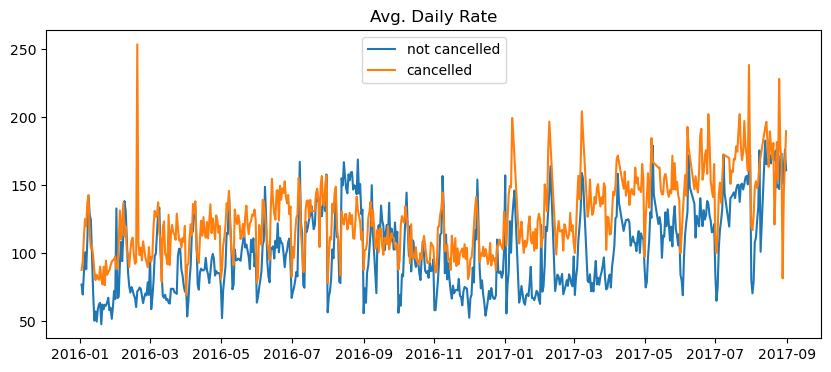

In [49]:
plt.figure(figsize=(10,4))
plt.plot(notcancelled_data_adr['reservation_status_date'],notcancelled_data_adr['adr'],label='not cancelled')
plt.plot(cancelled_data_adr['reservation_status_date'],cancelled_data_adr['adr'],label='cancelled')
plt.legend(['not cancelled','cancelled'])
plt.title('Avg. Daily Rate')
plt.show()

# Findings & Analysis

- In Fig 1, the bar graph shows the overall canceled and non canceled reservations. We can observe that 27.5% of reservations have been canceled.

- Fig 2 shows 1. For resort hotel 76.2% have not canceled the reservation while 23.7% have canceled the reservation ,For city hotel 69.9% have not canceled the reservation while 30% have canceled the reservation.

- In Fig 3, From the group bar chart we can observe that November is the month with the least amount of cancelations , March with most amount of cancellations and August with most number os reservations.

- Fig 4 , A bar graph of the average daily rate (adr) which clearly shows us that the most cancellation occur when the adr is at it's highest and less cancellations when adr is the lowest.
- ADR is the highest in the month of March 
- ADR is the lowest in the month of November
- We can say that cost of the accomodation is the main reason for the cancellation of reservations

- Fig 5 , The pi chart shows us that Portugal has the highest number of cancellations followed by:
2. Great Britain
3. Spain
4. France
5. Italy
6. Germany
7. Brazil
8. Ireland
9. United States of America
10. Belgium

- From analyzing the market segment column -  Around 76% of customers who cancelled come from online travel agencies. While the other 24% comes from Offline Travel agencies, direct, groups, coroporate, complementary and aviation.        

- Fig 6 , The line graph shows that reservations are cancelled when the average daily rate is higher. Thus we can conclude that the increase in price leads to a higher rate of cancellation.

# Recommendations

- In order to reduce the cancellations the hotels could work on various pricing strategies such as packages , discounts , price as per customer segment
- Hotels can provide offers during weekends and public holidays
- Consider improving the quality and services especially in the countries with most cancellations